In [1]:
import os
import numpy as np
import re
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from src import DynamicSafetyMap
%matplotlib inline

In [2]:
data_dir = "../../uncertainty-aware-hda/log/20221231_044438/"
scrit = 0.17453292519943295
rcrit= 0.2

def load_safety(idx=8, gsd_dir="gsd_500", sftype="rghns", crit=rcrit):

    idx_str = str(idx).zfill(5)
    if gsd_dir == "truth":
        pattern = re.compile(rf"{idx_str}.npy")
        dirname = "../../stochastic-hda-data/" + sftype
    else:
        pattern = re.compile(rf"{idx_str}_.*\.npy")
        dirname = os.path.join(data_dir, gsd_dir, "samples", sftype)

    sfmap_list = []
    for fname in os.listdir(dirname):
        if pattern.match(fname):
            sfmap = np.load(os.path.join(dirname, fname))[5:32-5, 5:32-5]
            sfmap_list.append(sfmap < crit)

    # take mean of safety maps
    sfmap = np.mean(sfmap_list, axis=0)
    return sfmap
    
    


In [11]:
gsd_dir_list = ["gsd_500", "gsd_400", "gsd_300", "gsd_200", "gsd_150", "truth"]
out_dir = "../saved/safetymap/"
for gsd_dir in gsd_dir_list:
    sfmap = load_safety(idx=8, gsd_dir=gsd_dir, sftype="rghns", crit=rcrit)

    if gsd_dir == "truth":
        # add random "0" elements to the map
        rng = np.random.RandomState(0)
        rand_map = rng.rand(sfmap.shape[0], sfmap.shape[1])
        rand_map = (rand_map < 0.05)
        sfmap[rand_map] = 0
    np.save(os.path.join(out_dir, f"{gsd_dir}.npy"), sfmap)

In [12]:
sfmap_list = []
for gsd_dir in gsd_dir_list:
    sfmap = np.load(os.path.join(out_dir, f"{gsd_dir}.npy"))
    sfmap_list.append(sfmap)

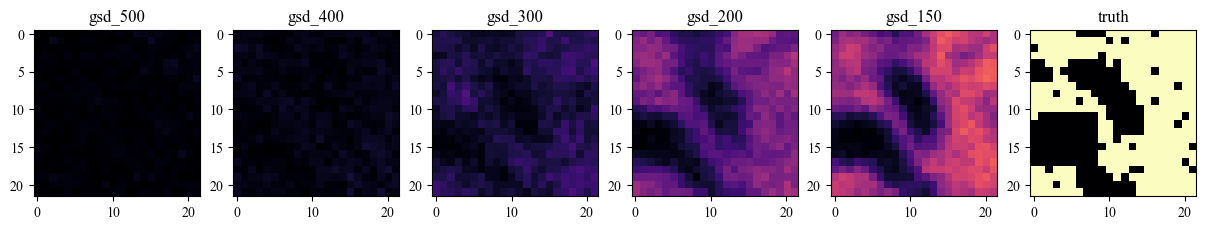

In [13]:
# Visualize safety maps with the same colorbar that ranges from 0 to 1
fig, axes = plt.subplots(1, len(sfmap_list), figsize=(15, 3))
for i, sfmap in enumerate(sfmap_list):
    axes[i].imshow(sfmap, cmap="magma", vmin=0, vmax=1)
    axes[i].set_title(gsd_dir_list[i])

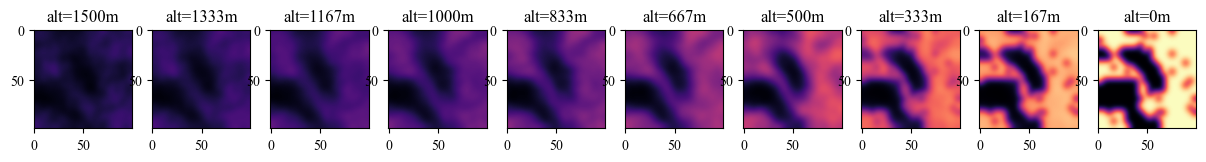

In [14]:
sfmap_list = []
alt_list = np.linspace(1500, 0, 10)
x_range = (-250, 250)
y_range = (-250, 250)
dynamic_sfmap = DynamicSafetyMap(x_range, y_range, npoints=100, relative_path="..")
for alt in alt_list:
    sfmap = dynamic_sfmap.get_sfmap(alt)
    sfmap = dynamic_sfmap.get_grid_sfmap(sfmap)[:, :, 2]
    sfmap_list.append(sfmap)

# Visualize safety maps with the same colorbar that ranges from 0 to 1
fig, axes = plt.subplots(1, len(sfmap_list), figsize=(15, 3))
for i, sfmap in enumerate(sfmap_list):
    axes[i].imshow(sfmap, cmap="magma", vmin=0, vmax=1)
    axes[i].set_title(f"alt={alt_list[i]:.0f}m")